## Importing packages

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import igraph as ig
import networkx as nx
import itertools
import math
import random
from scipy.stats import kde
from networkx.algorithms import bipartite

## Creating a bipartite graph

In [3]:
G = nx.Graph()

In [4]:
top_nodes = ['alice', 'bob', 'charlie','donna','eve']
bottom_nodes = ['DAILYSHOW','HUFFINGTONPOST','FOXNEWS','DRUDGEREPORT']
G.add_nodes_from(top_nodes, bipartite=0)
G.add_nodes_from(bottom_nodes, bipartite=1)
G.add_edges_from([('alice', 'DAILYSHOW'),
                  ('alice', 'HUFFINGTONPOST'),
                  ('bob', 'DAILYSHOW'),
                  ('bob', 'HUFFINGTONPOST'),
                  ('charlie', 'DAILYSHOW'),
                  ('charlie', 'HUFFINGTONPOST'),
                  ('donna', 'FOXNEWS'),
                  ('donna', 'DRUDGEREPORT'),
                  ('eve', 'FOXNEWS'),
                  ('eve', 'DRUDGEREPORT')])

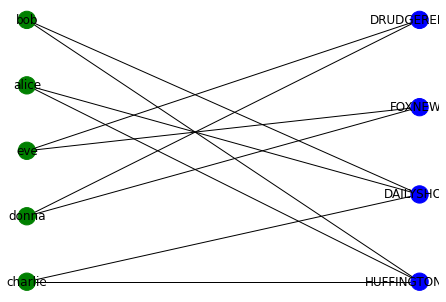

In [5]:
pos = nx.bipartite_layout(G,top_nodes)
nx.draw(G, pos=pos, with_labels=True,node_color=['green','green','green','green','green','blue','blue','blue','blue'])

## Generating the projection 

In [6]:
def projection(G):
    proj_1 = nx.bipartite.weighted_projected_graph(G,top_nodes)
    proj_2 = nx.bipartite.weighted_projected_graph(G,bottom_nodes)
    
    return proj_1, proj_2

In [7]:
proj_1, proj_2 = projection(G)

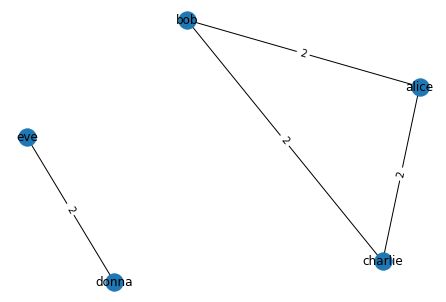

In [8]:
pos=nx.spring_layout(proj_1,k=10)
nx.draw(proj_1,pos,with_labels=True)
labels = {e: proj_1.edges[e]['weight'] for e in proj_1.edges}
nx.draw_networkx_edge_labels(proj_1,pos,edge_labels=labels)
plt.show()

In [17]:
print('PROJECTION 1')
print('')
print(f"Strenghts: {proj_1.degree(weight='weight')}")
print(f"Degrees: {proj_1.degree()}")
print(f"Betweeness: {nx.betweenness_centrality(proj_1, 3, normalized=True, weight='weight')}")

deg = dict(proj_1.degree()).values()
deg_pow = [math.pow(i,2) for i in deg]
heter = np.array(deg_pow).mean()/math.pow(np.array(list(deg)).mean(),2)
print(f"Heterogeneity parameter: {heter:.3f}")
print('That parameter indicates a normal or narrow distribution with a sharp peak at some value because k is close 1.')

PROJECTION 1

Strenghts: [('alice', 4), ('bob', 4), ('charlie', 4), ('donna', 2), ('eve', 2)]
Degrees: [('alice', 2), ('bob', 2), ('charlie', 2), ('donna', 1), ('eve', 1)]
Betweeness: {'alice': 0.0, 'bob': 0.0, 'charlie': 0.0, 'donna': 0.0, 'eve': 0.0}
Heterogeneity parameter: 1.094
That parameter indicates a normal or narrow distribution with a sharp peak at some value because k is close 1.


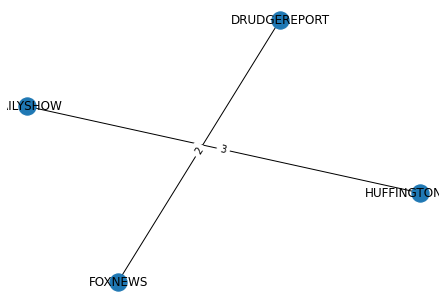

In [10]:
pos=nx.spring_layout(proj_2,k=10)
nx.draw(proj_2,pos,with_labels=True)
labels = {e: proj_2.edges[e]['weight'] for e in proj_2.edges}
nx.draw_networkx_edge_labels(proj_2,pos,edge_labels=labels)
plt.show()

In [18]:
print('PROJECTION 2')
print('')
print(f"Strenghts: {proj_2.degree(weight='weight')}")
print(f"Degrees: {proj_2.degree()}")
print(f"Betweeness: {nx.betweenness_centrality(proj_2, 4, normalized=True, weight='weight')}")

deg2 = dict(proj_2.degree()).values()
deg_pow2 = [math.pow(i,2) for i in deg2]
heter2 = np.array(deg_pow2).mean()/math.pow(np.array(list(deg2)).mean(),2)
print(f"Heterogeneity parameter (k): {heter2:.3f}")
print('That parameter indicates a normal or narrow distribution with a sharp peak at some value because k is 1.')

PROJECTION 2

Strenghts: [('DAILYSHOW', 3), ('HUFFINGTONPOST', 3), ('FOXNEWS', 2), ('DRUDGEREPORT', 2)]
Degrees: [('DAILYSHOW', 1), ('HUFFINGTONPOST', 1), ('FOXNEWS', 1), ('DRUDGEREPORT', 1)]
Betweeness: {'DAILYSHOW': 0.0, 'HUFFINGTONPOST': 0.0, 'FOXNEWS': 0.0, 'DRUDGEREPORT': 0.0}
Heterogeneity parameter (k): 1.000
That parameter indicates a normal or narrow distribution with a sharp peak at some value because k is 1.
